In [8]:
import pandas as pd
dados = pd.read_csv('dados_apartamentos_limpo_zona.csv')
dados = dados.drop(['Unnamed: 0','amenidades','endereco'],axis=1)

In [9]:
dados.tail()

,area,quartos,banheiros,vagas,preco,condominio,bairro,zona
6011,70,3,1,1,1700.0,380.0,Vila Formosa,Leste
6012,50,2,1,1,2700.0,320.0,Tatuapé,Leste
6013,102,3,2,2,6000.0,890.0,Quarta Parada,Leste
6014,132,3,3,1,3500.0,1210.0,Parque da Mooca,Leste
6015,47,1,1,1,2100.0,686.0,Tatuapé,Leste


In [11]:
dados.dtypes

area            int64
quartos         int64
banheiros       int64
vagas           int64
preco         float64
condominio    float64
bairro         object
zona           object
dtype: object

In [12]:
dados.shape

(6016, 8)

In [26]:
dados[(dados.zona=='Sul')&(dados.quartos==2)&(dados.banheiros==2)&(dados.vagas==2)&(dados.area==70)&(dados.bairro==' Vila Mariana')]

,area,quartos,banheiros,vagas,preco,condominio,bairro,zona
213,70,2,2,2,2700.0,1000.0,Vila Mariana,Sul
266,70,2,2,2,2700.0,1000.0,Vila Mariana,Sul


In [24]:
dados[(dados.zona=='Sul')&(dados.quartos==2)&(dados.banheiros==2)&(dados.vagas==2)&(dados.area==70)&(dados.bairro==' Vila Mariana')]['preco'].mean()

2700.0

In [27]:
dados[(dados.zona=='Sul')&(dados.quartos==2)&(dados.banheiros==2)&(dados.vagas==2)&(dados.area==70)]

,area,quartos,banheiros,vagas,preco,condominio,bairro,zona
213,70,2,2,2,2700.0,1000.0,Vila Mariana,Sul
266,70,2,2,2,2700.0,1000.0,Vila Mariana,Sul
317,70,2,2,2,4000.0,1062.0,Morumbi,Sul
481,70,2,2,2,3500.0,593.0,Vila Mascote,Sul
555,70,2,2,2,2950.0,1100.0,Campo Belo,Sul
566,70,2,2,2,3701.0,807.0,Brooklin,Sul
670,70,2,2,2,6000.0,700.0,Brooklin,Sul
808,70,2,2,2,3500.0,850.0,Morumbi,Sul
999,70,2,2,2,4500.0,852.0,Chácara Santo Antônio,Sul
1092,70,2,2,2,5300.0,1070.0,Moema,Sul


In [25]:
dados[(dados.zona=='Sul')&(dados.quartos==2)&(dados.banheiros==2)&(dados.vagas==2)&(dados.area==70)]['preco'].mean()

4026.2380952380954

In [38]:
dados.bairro.nunique()

211

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
y = dados['preco']

In [82]:
X = dados.drop(['bairro','preco'],axis=1)

In [83]:
X.head()

,area,quartos,banheiros,vagas,condominio,zona
0,46,1,1,1,600.0,Sul
1,240,5,5,4,3300.0,Sul
2,205,3,4,2,2380.0,Sul
3,56,2,2,1,630.0,Sul
4,45,1,1,1,612.0,Sul


In [84]:
X = pd.get_dummies(X)
X.head()

,area,quartos,banheiros,vagas,condominio,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
0,46,1,1,1,600.0,0,0,0,0,1
1,240,5,5,4,3300.0,0,0,0,0,1
2,205,3,4,2,2380.0,0,0,0,0,1
3,56,2,2,1,630.0,0,0,0,0,1
4,45,1,1,1,612.0,0,0,0,0,1


In [37]:
X.tail()

,area,quartos,banheiros,vagas,condominio,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
6011,70,3,1,1,380.0,0,1,0,0,0
6012,50,2,1,1,320.0,0,1,0,0,0
6013,102,3,2,2,890.0,0,1,0,0,0
6014,132,3,3,1,1210.0,0,1,0,0,0
6015,47,1,1,1,686.0,0,1,0,0,0


In [85]:
y

0        3400.0
1       15000.0
2        7900.0
3        2900.0
4        2800.0
         ...   
6011     1700.0
6012     2700.0
6013     6000.0
6014     3500.0
6015     2100.0
Name: preco, Length: 6016, dtype: float64

In [55]:
knn = KNeighborsRegressor(n_neighbors=15,weights='distance')

In [56]:
knn.fit(X,y)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [61]:
knn.predict([[70, 2, 2, 2, 740, 0, 0, 0, 0, 1]])

array([2609.08827056])

In [63]:
import matplotlib.pyplot as plt
import numpy as np

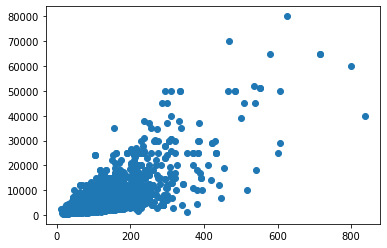

In [62]:
plt.scatter(dados['area'],dados['preco'])

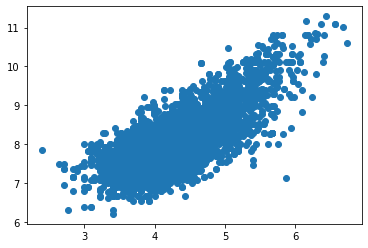

In [64]:
plt.scatter(np.log(dados['area']),np.log(dados['preco']))

In [65]:
dados_reduzidos = dados[['area','preco']]

In [66]:
dados_reduzidos.head()

,area,preco
0,46,3400.0
1,240,15000.0
2,205,7900.0
3,56,2900.0
4,45,2800.0


In [67]:
X = dados_reduzidos['area']
y = dados_reduzidos['preco']

In [73]:
X.values

array([ 46, 240, 205, ..., 102, 132,  47])

In [74]:
X.values.reshape(-1,1)

array([[ 46],
       [240],
       [205],
       ...,
       [102],
       [132],
       [ 47]])

In [75]:
from sklearn.linear_model import LinearRegression

In [78]:
reg = LinearRegression()
reg.fit(X.values.reshape(-1,1),y)

LinearRegression()

In [79]:
reg.coef_

array([62.03422149])

In [80]:
reg.intercept_

-1171.6503688941334


$$Ax + b = y$$

$$62.03 x area - 117.65 = Aluguel$$

In [86]:
reg.fit(X,y)

LinearRegression()

In [87]:
X.head()

,area,quartos,banheiros,vagas,condominio,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
0,46,1,1,1,600.0,0,0,0,0,1
1,240,5,5,4,3300.0,0,0,0,0,1
2,205,3,4,2,2380.0,0,0,0,0,1
3,56,2,2,1,630.0,0,0,0,0,1
4,45,1,1,1,612.0,0,0,0,0,1


$$ aluguel = w_1*area + w_2*quartos + w_3*banheiros + w_4*condominio .... + w_9*zona_Sul $$

In [89]:
reg.coef_

array([ 6.73381136e+01, -1.61770622e+03,  2.59479991e+02,  5.28867890e+02,
        1.66077767e-03, -2.86283140e+02, -3.12090314e+02, -7.16891105e+01,
       -2.01573477e+01,  6.90219912e+02])

In [90]:
reg.intercept_

234.96413798075764

In [92]:
reg.predict([[70, 2, 2, 2, 740, 0, 0, 0, 0, 1]])

array([3981.36430395])

In [95]:
X2 = np.log1p(X)

In [96]:
reg2 = LinearRegression()
reg2.fit(X2,y)

LinearRegression()

In [97]:
reg2.predict([[70, 2, 2, 2, 740, 0, 0, 0, 0, 1]])

array([352795.78983006])

In [120]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [118]:
dados2 = dados[dados['preco']<=20000]
dados2.head()

,area,quartos,banheiros,vagas,preco,condominio,bairro,zona
0,46,1,1,1,3400.0,600.0,Moema,Sul
1,240,5,5,4,15000.0,3300.0,Chácara Santo Antônio,Sul
2,205,3,4,2,7900.0,2380.0,Itaim Bibi,Sul
3,56,2,2,1,2900.0,630.0,Vila Mariana,Sul
4,45,1,1,1,2800.0,612.0,Moema,Sul


In [110]:
X2 = dados2.drop(['bairro','preco'],axis=1)
X2 = pd.get_dummies(X2)
X2.head()

,area,quartos,banheiros,vagas,condominio,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
0,46,1,1,1,600.0,0,0,0,0,1
1,240,5,5,4,3300.0,0,0,0,0,1
2,205,3,4,2,2380.0,0,0,0,0,1
3,56,2,2,1,630.0,0,0,0,0,1
4,45,1,1,1,612.0,0,0,0,0,1


In [111]:
y2 = dados2['preco']

In [123]:
dt2 = DecisionTreeRegressor(max_depth=2)
dt2.fit(X2,y2)

DecisionTreeRegressor(max_depth=2)

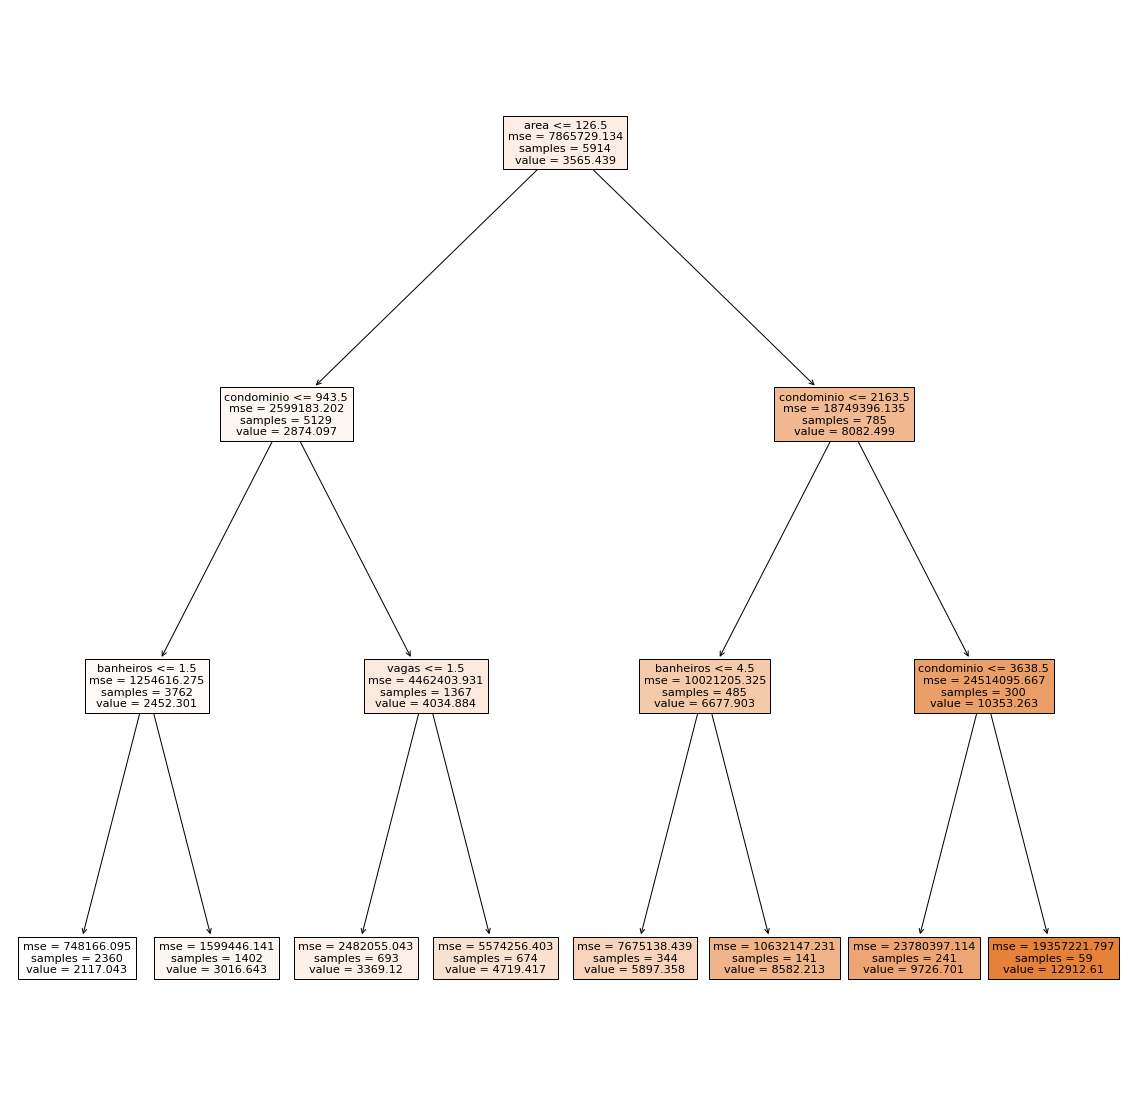

In [115]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt2,filled=True, feature_names = X.columns);

In [121]:
dt.predict([[70, 2, 2, 2, 740, 0, 0, 0, 0, 1]])

array([2704.99851254])

In [124]:
dt2.predict([[70, 2, 2, 2, 740, 0, 0, 0, 0, 1]])

array([2452.30090377])